<a href="https://colab.research.google.com/github/nnguyenu/ML-basic/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import math
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
def grad1(x):
    return 2*x+ 5*np.cos(x)

def cost1(x):
    return x**2 + 5*np.sin(x)

def myGD1(eta, x0):
    x = [x0]
    for iterations in range(100):
        x_new = x[-1] - eta*grad1(x[-1])
        if abs(grad1(x_new)) < 1e-5:
            break
        x.append(x_new)
    return (x, iterations)

In [ ]:
(x1, it1) = myGD1(.1, -5)
(x2, it2) = myGD1(.1, 5)
print('Solution x1 = %f, cost = %f, obtained after %d iterations'%(x1[-1], cost1(x1[-1]), it1))
print('Solution x2 = %f, cost = %f, obtained after %d iterations'%(x2[-1], cost1(x2[-1]), it2))

Solution x1 = -1.110513, cost = -3.246394, obtained after 15 iterations
Solution x2 = -1.110508, cost = -3.246394, obtained after 33 iterations


Solution found by formula: w =  [[4.00896438 2.97782405]]
[0. 1.] [4.00896438 6.98678843]


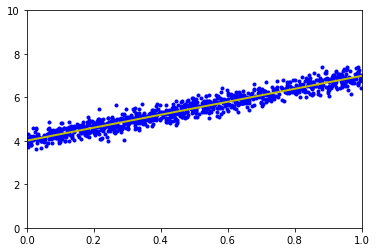

In [ ]:
np.random.seed(2)
# Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1).
X = np.random.rand(1000, 1) # X.shape = (1000,1)
# Return sample from the “standard normal” distribution (mean=0,standard deviation=1)
noise = np.random.randn(1000, 1)
y = 4 + 3 * X + .25*noise # noise added

# Building Xbar 
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X), axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w_lr = np.dot(np.linalg.pinv(A), b)
print('Solution found by formula: w = ',w_lr.T)

# Display result
w = w_lr
w_0 = w[0][0]
w_1 = w[1][0]
# Return evenly spaced numbers over a specified interval (2 points 0 & 1)
x0 = np.linspace(0, 1, 2, endpoint=True)
y0 = w_0 + w_1*x0
print(x0,y0)
# Draw the fitting line 
plt.plot(X.T, y.T, 'b.')     # data 
plt.plot(x0, y0, 'y', linewidth = 2)   # the fitting line
plt.axis([0, 1, 0, 10])
plt.show()

In [ ]:
def grad(w):
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

# calculate loss function
def cost(w):
    N = Xbar.shape[0]
    return 1/(2*N)*np.linalg.norm(y - Xbar.dot(w), 2)**2

In [ ]:
def numerical_grad(w, cost):
    eps = 1e-4
    g = np.zeros(w.shape) # create zero array with same shape as w
    # calculate gradient for each w[i]
    w_p = w.copy()
    w_n = w.copy()
    for i in range(len(w)):
        w_p[i] += eps 
        w_n[i] -= eps
        g[i] = (cost(w_p) - cost(w_n))/(2*eps)
        w_p[i] -= eps
        w_n[i] += eps
    return g 

# check if numerical_grad is the same as normal gradient
def check_grad(shape, cost, grad):
    w = np.random.rand(shape[0], shape[1])
    grad1 = grad(w)
    grad2 = numerical_grad(w, cost)
    if np.linalg.norm(grad1 - grad2) < 1e-6:
      return True
    return False
print( 'Checking gradient...', check_grad([2,1], cost, grad))

0.02954013831290531
Checking gradient... True


In [ ]:
def myGD(w_init, grad, eta):
    w = [w_init]
    for it in range(1000):
        #can use numerical_grad
        w_new = w[-1] - eta*grad(w[-1])
        if np.linalg.norm(grad(w_new))/len(w_new) < 1e-5:   
            break 
        w.append(w_new)
    return (w, it) 

w_init = np.array([[2], [1]])
(w1, it1) = myGD(w_init, grad, 1)
print('Solution found by GD: w = ', w1[-1].T, ',\nafter %d iterations.' %(it1+1))

Solution found by GD: w =  [[4.00911521 2.97753448]] ,
after 119 iterations.


In [ ]:
# check convergence
def has_converged(theta_new, grad):
    return np.linalg.norm(grad(theta_new))/len(theta_new) < 1e-3

def GD_momentum(theta_init, grad, eta, gamma):
    # Suppose we want to store history of theta
    theta = [theta_init]
    v_old = np.zeros_like(theta_init)
    for it in range(100):
        v_new = gamma*v_old + eta*grad(theta[-1])
        theta_new = theta[-1] - v_new
        if has_converged(theta_new, grad):
            break 
        theta.append(theta_new)
        v_old = v_new
    return theta 
    # this variable includes all points in the path
    # if you just want the final answer, 
    # use `return theta[-1]`

In [ ]:
# single point gradient
def sgrad(w, i, rd_id):
    true_i = rd_id[i]
    xi = Xbar[true_i, :]
    yi = y[true_i]
    a = np.dot(xi, w) - yi
    return (xi*a).reshape(2, 1)

def SGD(w_init, grad, eta):
    w = [w_init]
    w_last_check = w_init
    iter_check_w = 10
    N = X.shape[0]
    count = 0
    for it in range(10):
        # shuffle data 
        rd_id = np.random.permutation(N)
        for i in range(N):
            count += 1 
            g = sgrad(w[-1], i, rd_id)
            w_new = w[-1] - eta*g
            w.append(w_new)
            if count % iter_check_w == 0:
                w_this_check = w_new                 
                if np.linalg.norm(w_this_check - w_last_check)/len(w_init) < 1e-3:                                    
                    return w
                w_last_check = w_this_check
